##Background:

- We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

- We are interested in developing a robust machine learning system that leverages information coming from call center data.

- Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

##Data Description:

- The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

##Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

####y - has the client subscribed to a term deposit? (binary)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/Colab Notebooks/apziva/term-deposit-marketing-2020.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


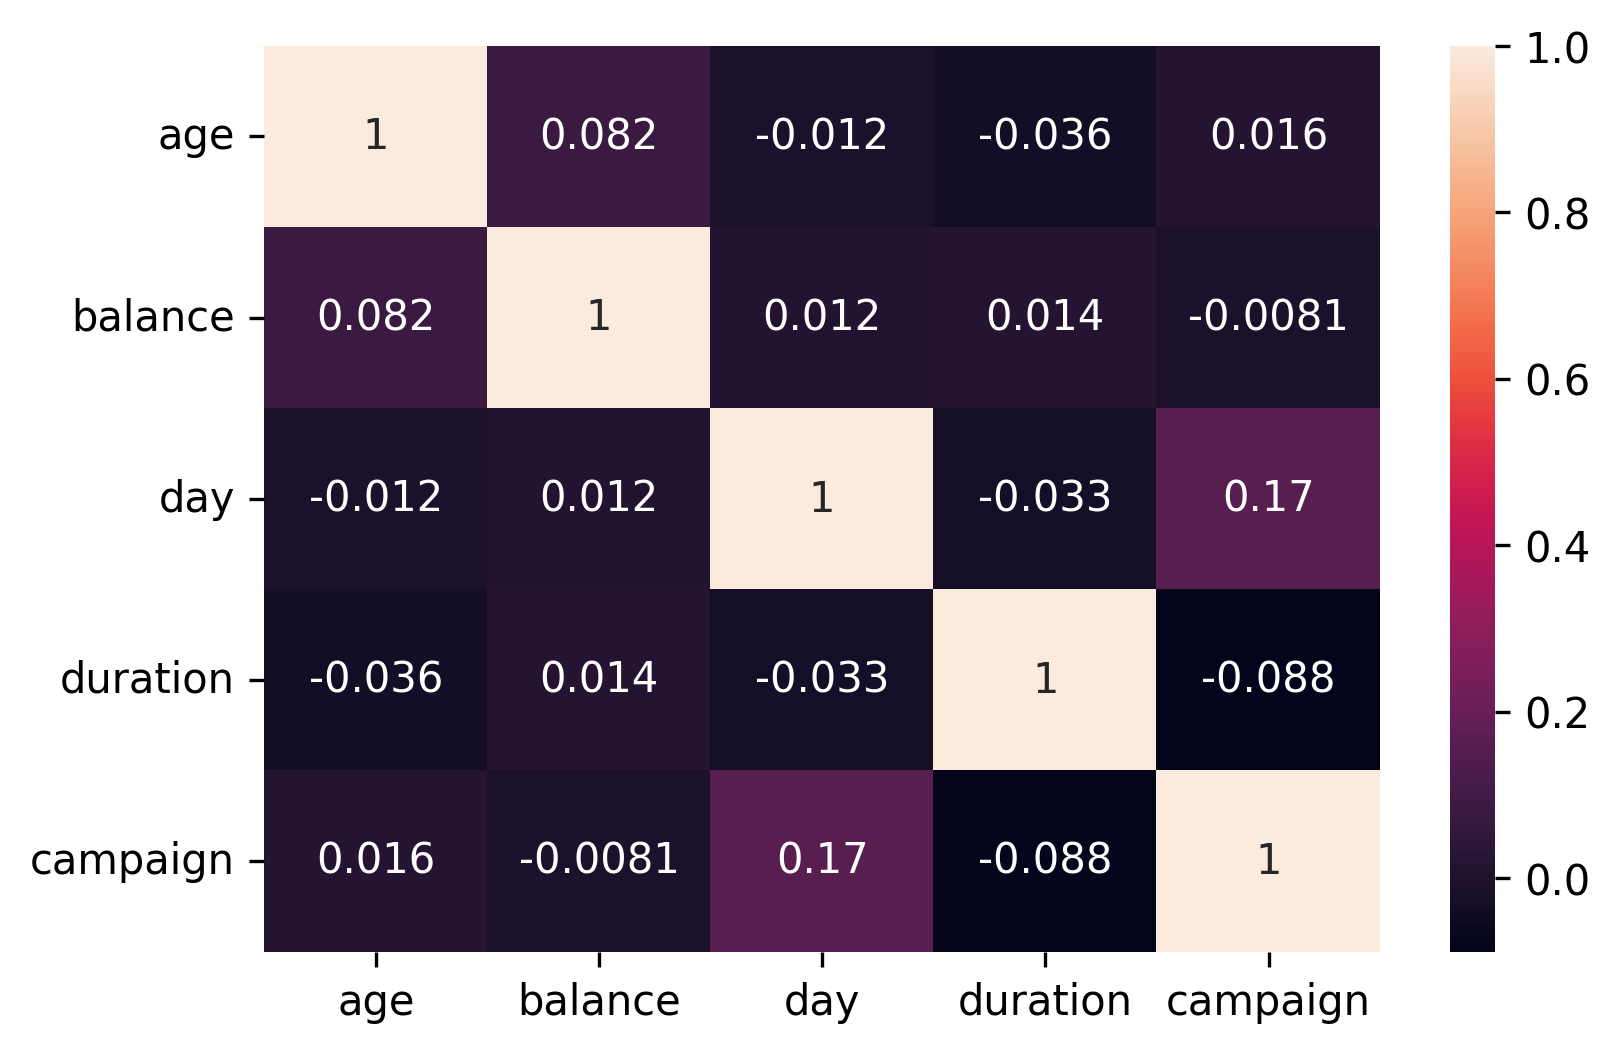

In [7]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import seaborn as sns
corr_data = data.iloc[:,:-1]
corr = corr_data.corr()
sns.heatmap(corr, annot=True)
# check the correlation plots

# all the features has very little to no correlation to each other, which means they are very much independent

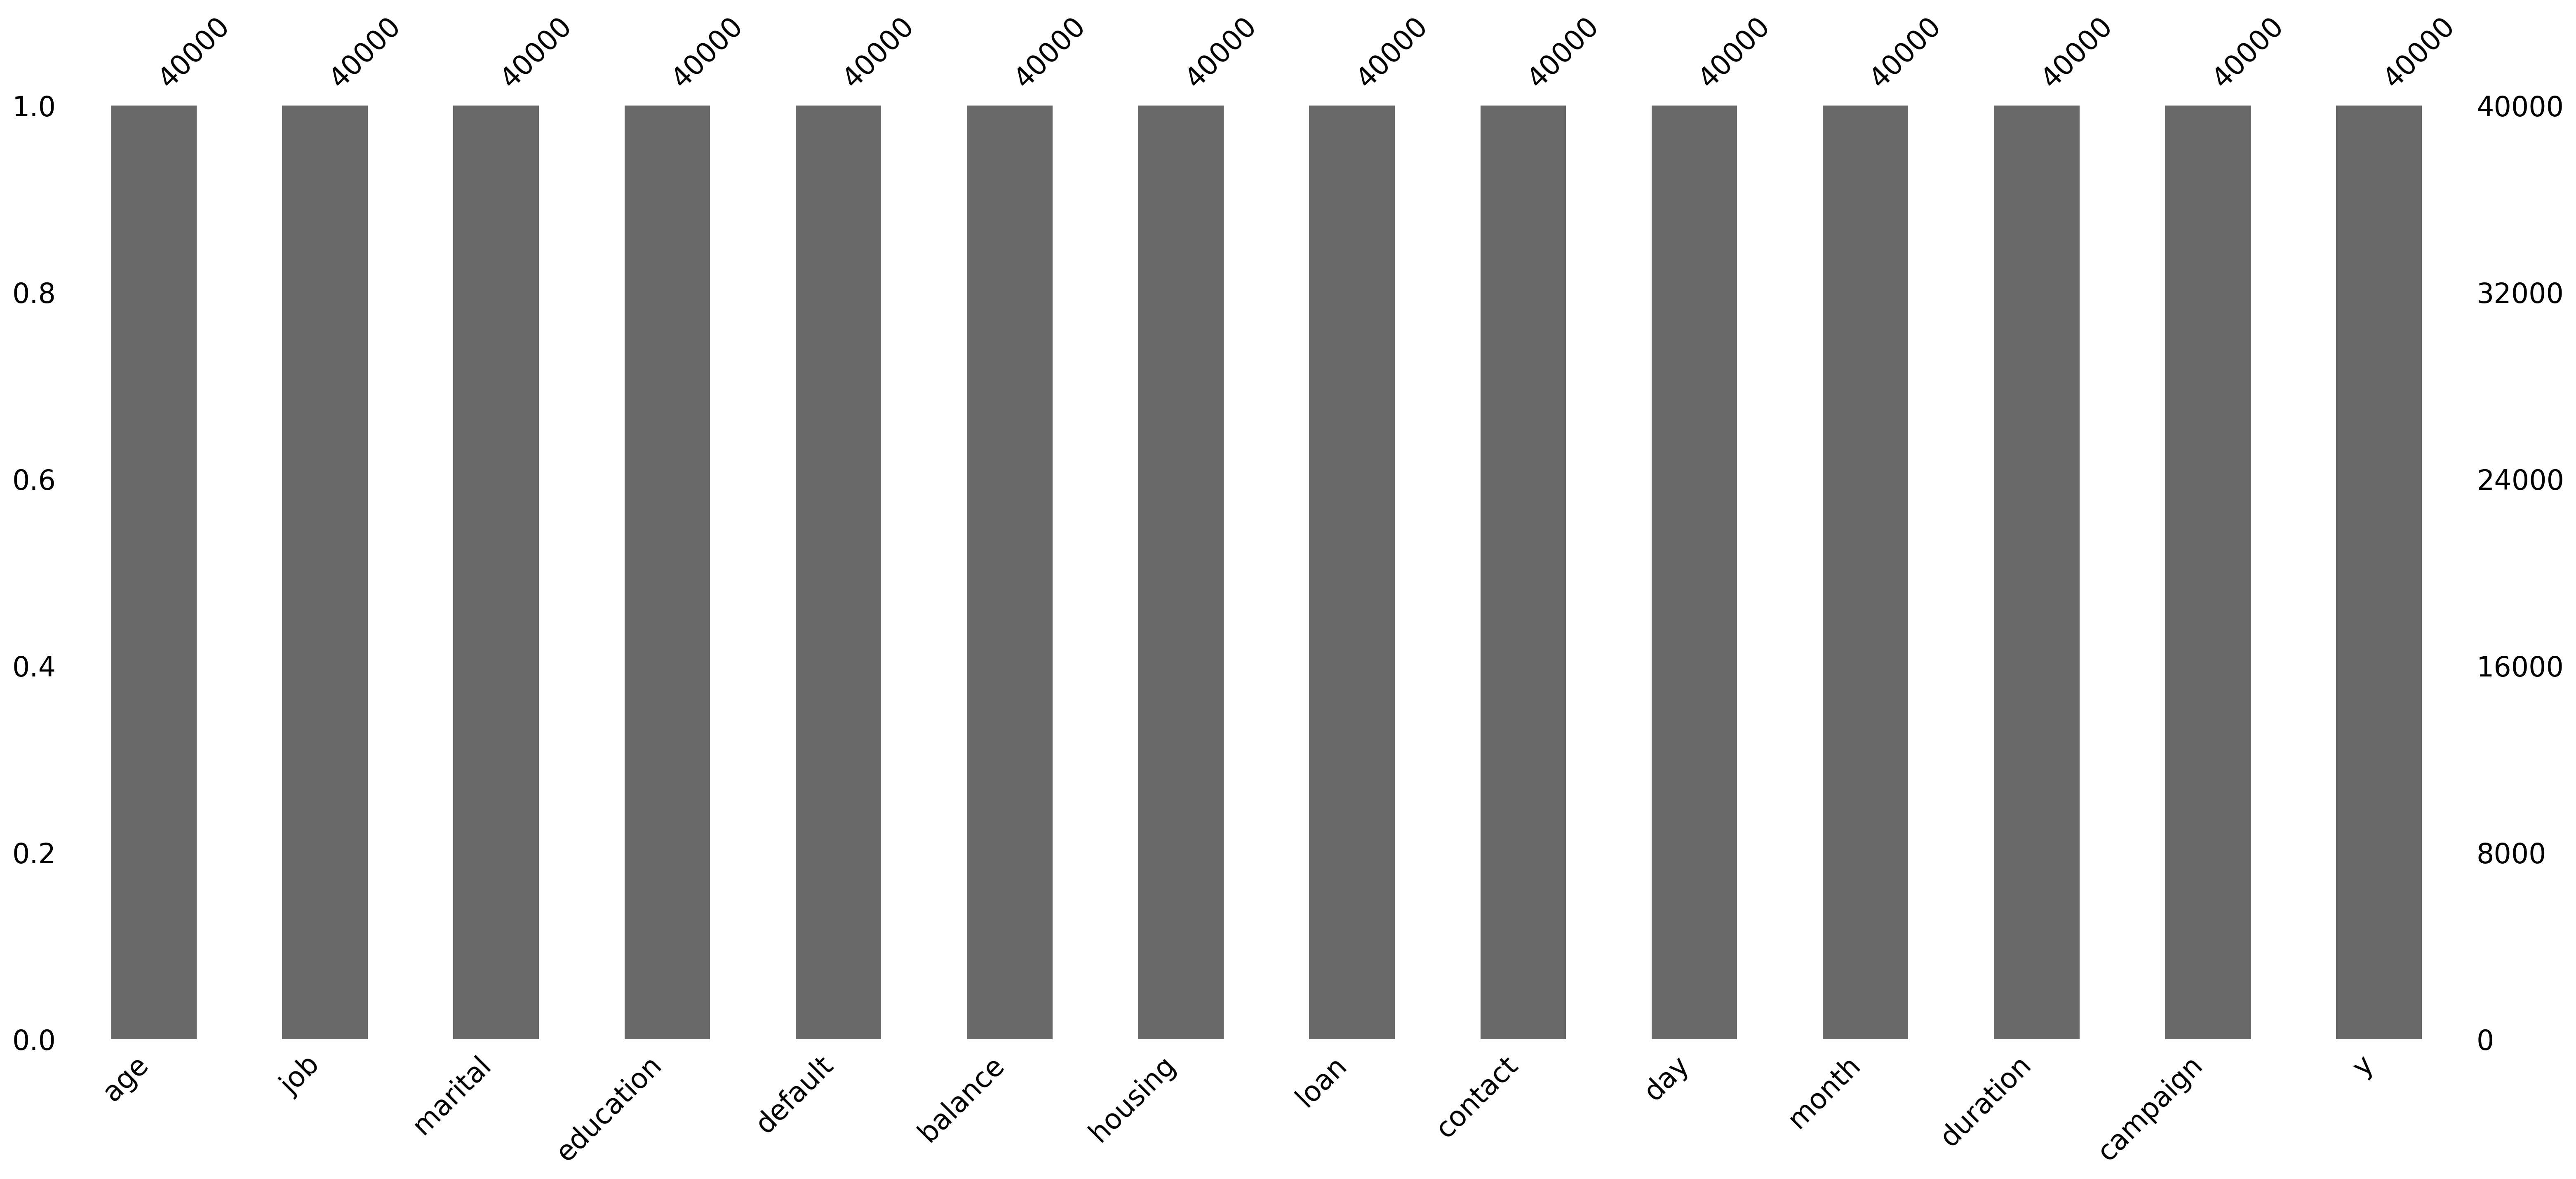

In [8]:
import missingno as msno
msno.bar(data)
# check if there are missing datas


In [12]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [15]:
data.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81])

In [16]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# there are 235 rows with "unkown" as job

In [22]:
data.loc[data.job =='unknown'].job.count()

235

In [31]:

data.marital.unique()


array(['married', 'single', 'divorced'], dtype=object)

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [35]:
data.loc[data.education =='unknown'].education.count()

1531

In [43]:
data.loc[(data.education =='unknown') & (data.contact == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,no
16,45,admin,single,unknown,no,13,yes,no,unknown,5,may,98,1,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,31,technician,single,unknown,no,365,no,no,unknown,4,jul,257,1,no
12656,61,retired,married,unknown,no,-492,no,yes,unknown,4,jul,333,1,no
24081,57,unknown,married,unknown,no,19268,no,no,unknown,23,oct,301,1,yes
24175,46,unknown,married,unknown,no,677,no,no,unknown,13,nov,722,1,no


In [ ]:
# 1531 rows with "unknown" as education, 666 of them has unknown contact


In [53]:
data.default.unique()
data.balance.value_counts()

 0         3209
 1          179
 2          141
 4          126
 3          124
           ... 
-544          1
 4749         1
 21111        1
 4965         1
 102127       1
Name: balance, Length: 6849, dtype: int64

In [55]:
data.balance.describe

count     40000.000000
mean       1274.277550
std        2903.769716
min       -8019.000000
25%          54.000000
50%         407.000000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64

In [56]:
data.y.describe()

count     40000
unique        2
top          no
freq      37104
Name: y, dtype: object

# final: getting rid of 235 rows of "unknown" in "jobs" colum, and "contact" as columns

In [65]:
#data.drop(columns = ['contact'],inplace = True)
#data = data.loc[data.job !='unknown']
data.to_pickle(path = 'drive/MyDrive/Colab Notebooks/apziva/term-deposit-marketing-2020_clean.csv')

In [64]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# There is a huge Class imbalance problem,
attempt to deal with that: 
using the Python library imbalanced-learn.
# 1. Use Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class

# 2. Use Under-sampling: Tomek links to undersample the data

In [ ]:
# for both SMOTE and TOMEK will need to encode the categorial data